In [77]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r"C:\Users\USER\Downloads\movies.csv")

# Data Exploration

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 5445 to 3203
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5436 non-null   object 
 1   rating        5424 non-null   object 
 2   genre         5436 non-null   object 
 3   year          5436 non-null   int64  
 4   released      5436 non-null   object 
 5   score         5436 non-null   float64
 6   votes         5436 non-null   int64  
 7   director      5436 non-null   object 
 8   writer        5436 non-null   object 
 9   star          5436 non-null   object 
 10  country       5435 non-null   object 
 11  budget        5436 non-null   int64  
 12  gross         5436 non-null   int64  
 13  company       5434 non-null   object 
 14  runtime       5435 non-null   float64
 15  correct_year  5436 non-null   int32  
dtypes: float64(2), int32(1), int64(4), object(9)
memory usage: 700.7+ KB


In [167]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [78]:
# Checking duplicate

df.duplicated().sum()

0

In [79]:
# Checking Null by Loop through each column in the DataFrame

for col in df.columns:
    # Calculate the percentage of missing values in the current column
    pct_missing = np.mean(df[col].isnull()) * 100
    print('{} - {:.1f}%'.format(col, pct_missing))


name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.3%
gross - 2.5%
company - 0.2%
runtime - 0.1%


# Data Cleaning

In [80]:
# drop null in budget

df_without_null = df.dropna(subset = ['budget'])
df.dropna(subset=['budget'], inplace = True)

# drop null in gross 

df_without_null_gr = df.dropna(subset = ['gross'])
df.dropna(subset=['gross'], inplace = True)

In [81]:
# ReChecking Null 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) * 100
    print('{} - {:.1f}%'.format(col, pct_missing))

name - 0.0%
rating - 0.2%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [82]:
# Convert data type to int

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

In [83]:
# Create correct year column by extracting from a pattern of sequence of four digit

df['correct_year'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [84]:
# Sort Decending a Dataframe 

df = df.sort_values(by=['gross'],inplace = False, ascending = False)

# Correlation Analysis

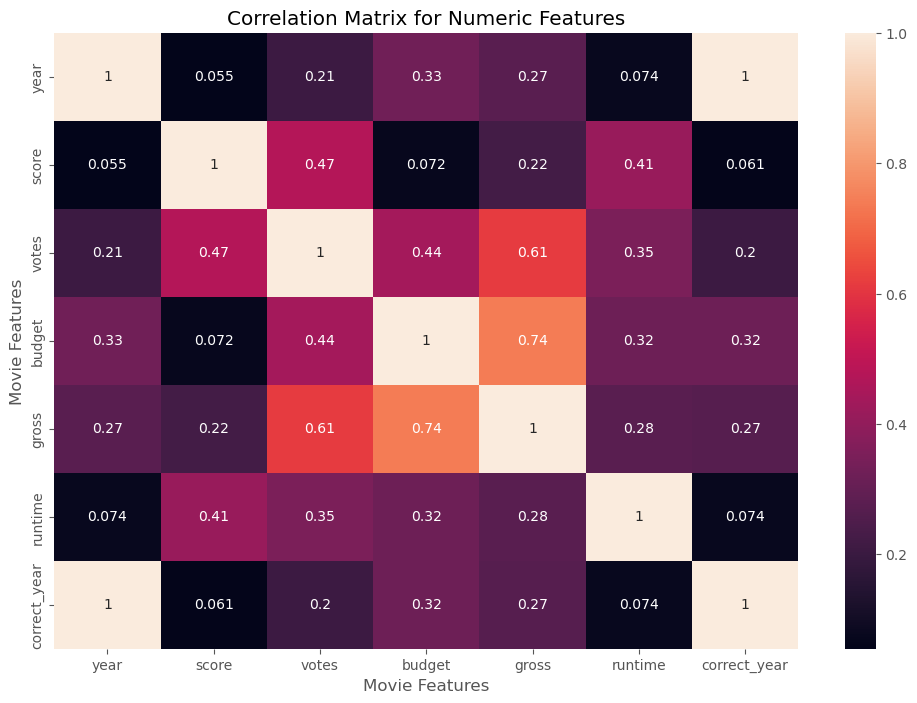

In [85]:
# Heatmap Correlation

correlation_metrix = df.corr(method = 'pearson')

sns.heatmap(correlation_metrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

Text(0, 0.5, 'Budget Spend (B)')

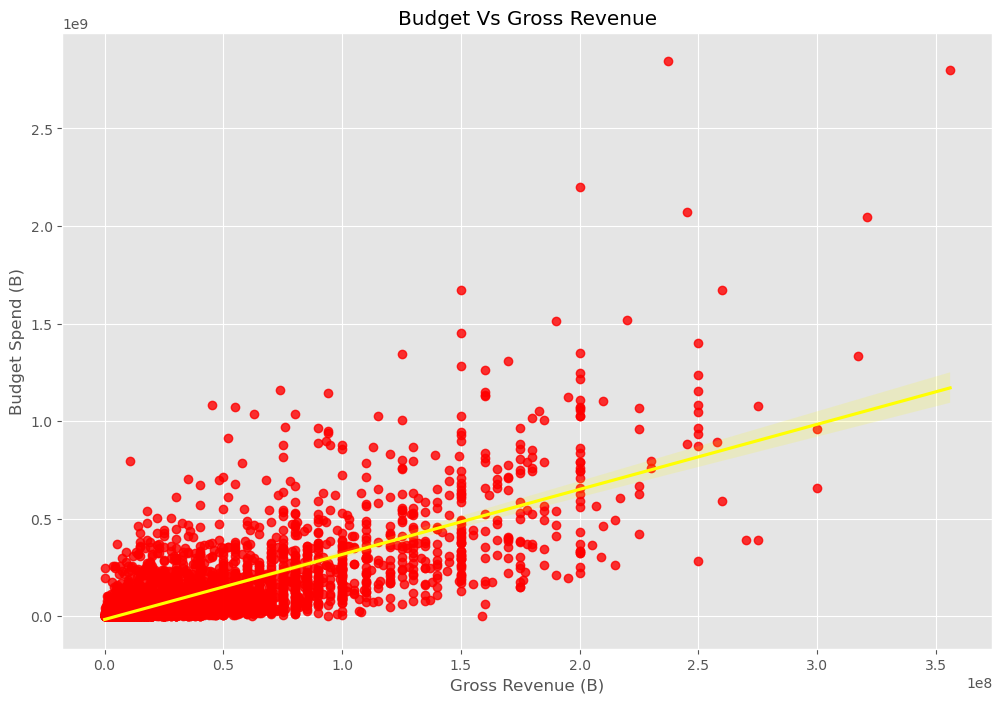

In [86]:
# Budget Vs Gross Using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "red"}, line_kws = {"color":"yellow"})

plt.title('Budget Vs Gross Revenue')

plt.xlabel('Gross Revenue (B)')
plt.ylabel('Budget Spend (B)')

Text(0, 0.5, 'Gross Revenue (Billion)')

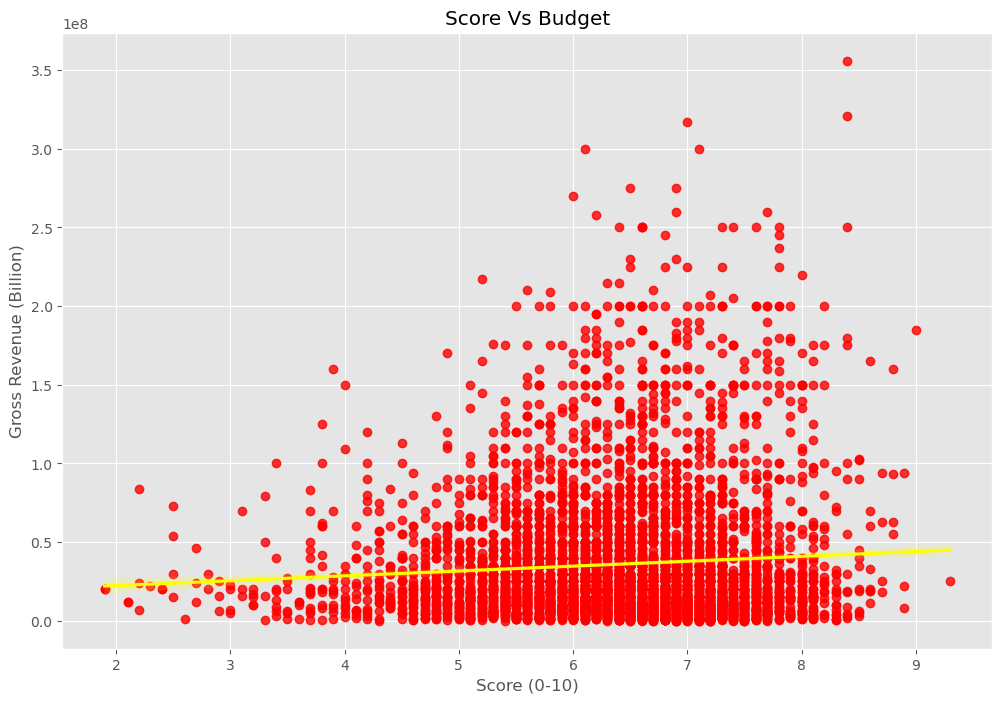

In [127]:
sns.regplot(x = 'score', y = 'budget', data = df, scatter_kws = {"color": "red"}, line_kws = {"color":"yellow"})

plt.title('Score Vs Budget')

plt.xlabel('Score (0-10)')
plt.ylabel('Gross Revenue (Billion)')

Text(0, 0.5, 'Gross Revenue (Billion)')

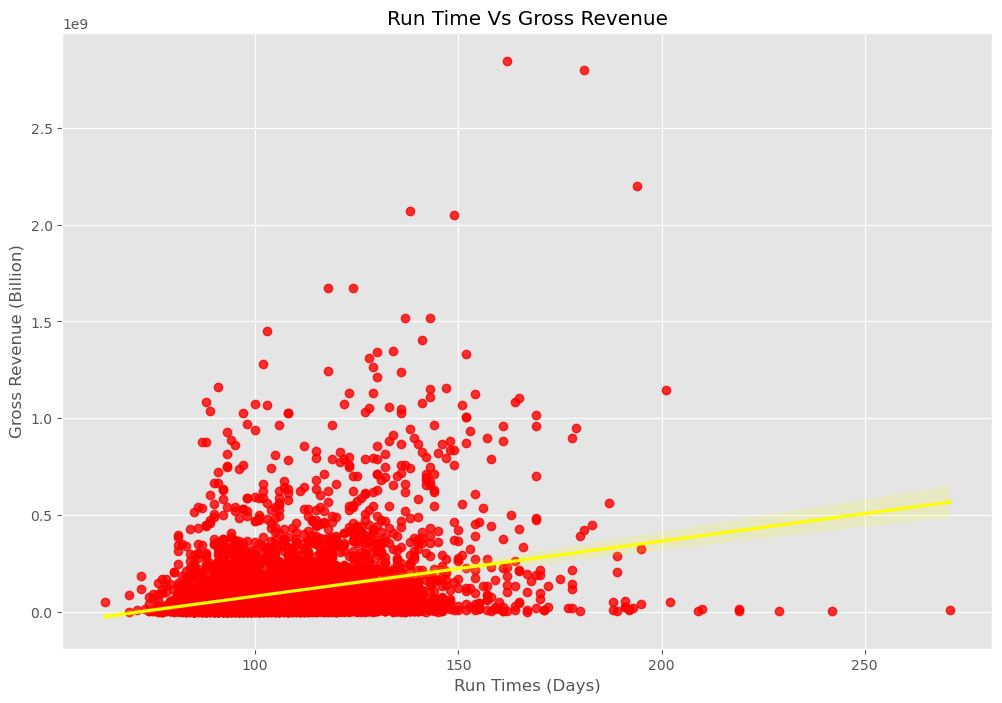

In [126]:
sns.regplot(x = 'runtime', y = 'gross', data = df, scatter_kws = {"color": "red"}, line_kws = {"color":"yellow"})

plt.title('Run Time Vs Gross Revenue')

plt.xlabel('Run Times (Days)')
plt.ylabel('Gross Revenue (Billion)')

In [162]:
# Top Correlation (A value > 5)

# Excluding columns 'year' and 'correct_year'
col_to_exclude = ['year', 'correct_year']
filtered_col = [col for col in df.columns if col not in col_to_exclude]

# Calculating correlation matrix
correlation = df[filtered_col].corr()

# Flattening the correlation matrix and only keep unique pairs
corr_pairs = correlation.unstack().reset_index()
corr_pairs.columns = ['Column1', 'Column2', 'Correlation']
unique_corr_pairs = corr_pairs[corr_pairs['Column1'] < corr_pairs['Column2']]

sorted_corr_pairs = unique_corr_pairs.sort_values(by='Correlation')

# Filtering out correlations above 0.5
high_corr = sorted_corr_pairs[sorted_corr_pairs['Correlation'] > 0.5]

high_corr


   Column1 Column2  Correlation
16   gross   votes     0.614904
13  budget   gross     0.740395


# Company Overview

In [148]:
# Sorting top 10 companies by Revenue and Budget Spend

comp_rev = df.groupby('company')[['gross']].sum()
top_10_comp = comp_rev.sort_values('gross', ascending = False)[:10]

# Sorting top spend budget companies
comp_bud = df.groupby('company')[['budget']].sum()
top_10_bud_comp = comp_bud.sort_values('budget', ascending = False)[:10]

top_10_comp['gross'] = top_10_comp['gross'].apply('{:,.0f}'.format)
top_10_bud_comp['budget'] = top_10_bud_comp['budget'].apply('{:,.0f}'.format)


print(top_10_comp)
print(top_10_bud_comp)

                                gross
company                              
Warner Bros.           54,773,202,654
Universal Pictures     51,241,105,418
Columbia Pictures      42,356,430,218
Paramount Pictures     40,021,704,691
Twentieth Century Fox  39,542,573,303
Walt Disney Pictures   35,833,650,748
New Line Cinema        19,628,786,232
Marvel Studios         15,065,592,411
DreamWorks Animation   11,873,612,858
Dreamworks Pictures    11,593,807,697
                                   budget
company                                  
Warner Bros.               19,568,300,000
Universal Pictures         15,989,730,001
Columbia Pictures          15,512,107,000
Paramount Pictures         13,723,450,000
Twentieth Century Fox      11,474,600,000
Walt Disney Pictures       10,404,700,000
New Line Cinema             5,648,200,000
Touchstone Pictures         4,153,700,000
Dreamworks Pictures         3,961,700,000
Metro-Goldwyn-Mayer (MGM)   3,543,250,000


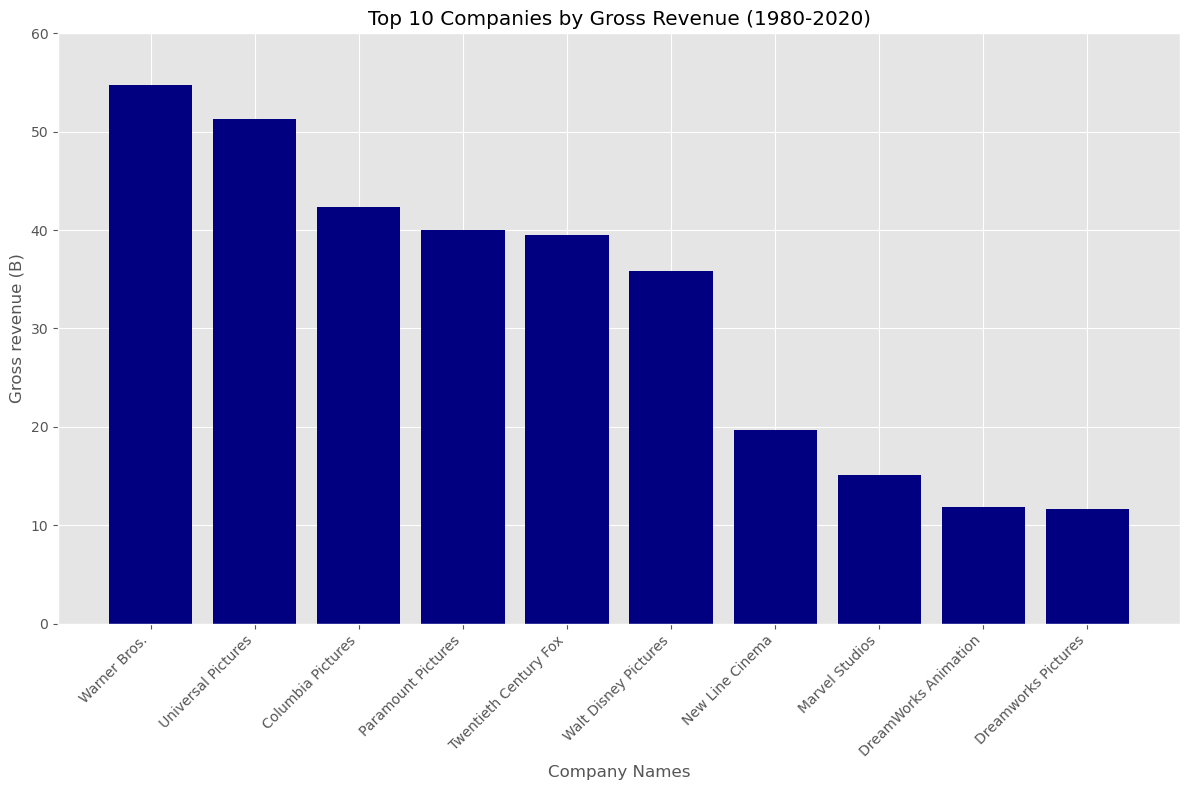

In [95]:
# Bar Chart Company The Company Revenue

comp_df = pd.DataFrame({'gross': top_10_companies['gross']}).reset_index()

plt.bar(comp_df['company'], comp_df['gross'], color='navy')
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.xlabel('Company Name')
plt.ylabel('Gross Revenue (B)')
plt.title('Top 10 Companies by Gross Revenue')

# Modify y-axis ticks to represent values in terms of 1 billion
plt.yticks(plt.gca().get_yticks(), ['{:,.0f}'.format(x/1000000000) for x in plt.gca().get_yticks()])
plt.tight_layout()

plt.show()

In [ ]:
Company Market Share

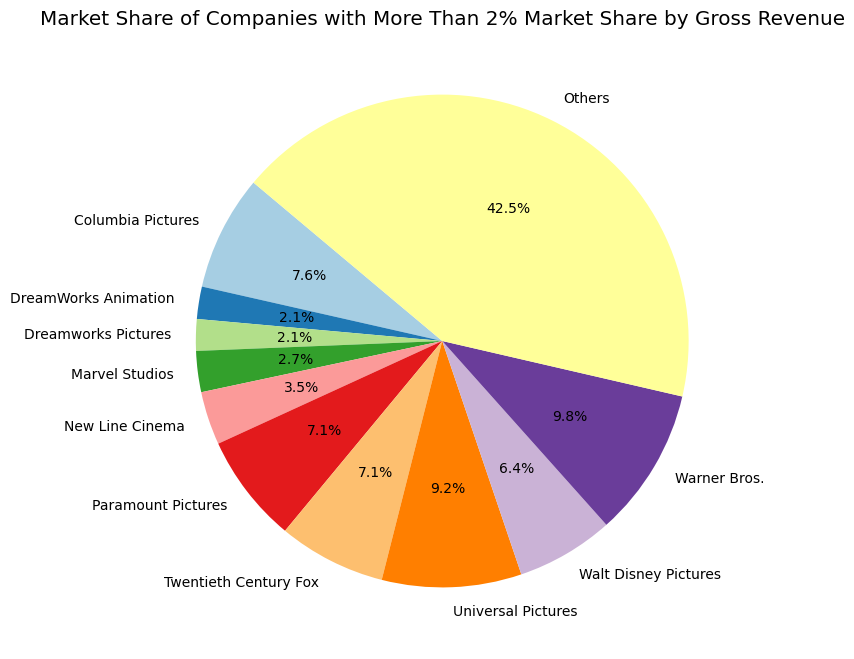

In [116]:
# Market Share

total_revenue = df['gross'].sum()

market_share = (comp_rev['gross'] / total_revenue) * 100

filtered_market_share = market_share[market_share > 2]

others_market_share = 100 - filtered_market_share.sum()

final_market_share = pd.concat([filtered_market_share, pd.Series(others_market_share, index=['Others'])])

plt.figure(figsize=(8, 8))
plt.pie(final_market_share, labels=final_market_share.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Market Share of Companies with More Than 2% Market Share by Gross Revenue')

plt.show()

# Genre Overview

In [140]:
# Look at amount of film in each Genre

genre_counts = df['genre'].value_counts()

genre_counts


Comedy       1496
Action       1417
Drama         869
Crime         400
Adventure     327
Biography     312
Animation     278
Horror        254
Fantasy        42
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

In [165]:
# Top 10 Genre by gross revenue

genre_rev = df.groupby('genre')[['gross']].sum()

top_10_genres = rev_by_gen.sort_values('gross', ascending = False)[:10]
top_10_genres = top_10_genres['gross'].apply('{:,.0f}'.format)

top_10_genres

genre
Action       237,791,033,560
Comedy        88,514,817,620
Animation     77,874,645,616
Drama         52,341,119,281
Adventure     43,578,711,908
Crime         20,032,912,756
Biography     19,096,617,444
Horror        14,262,010,058
Family         2,074,332,587
Mystery        2,004,091,467
Name: gross, dtype: object

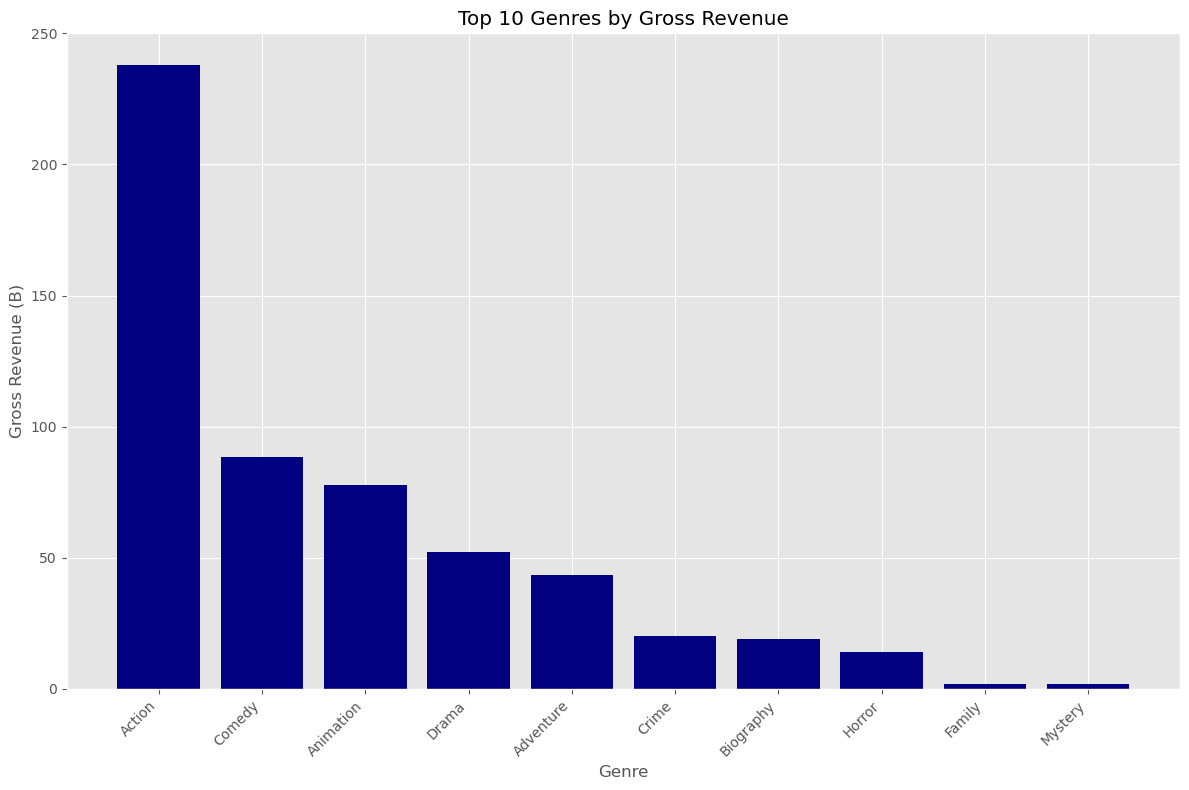

In [137]:
# Bar Chart Company The Company Revenue

genre_df = pd.DataFrame({'gross': top_10_genres['gross']}).reset_index()

plt.bar(genre_df['genre'], genre_df['gross'], color='navy')
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.xlabel('Genre')
plt.ylabel('Gross Revenue (B)')
plt.title('Top 10 Genres by Gross Revenue')

# Modify y-axis ticks to represent values in terms of 1 billion
plt.yticks(plt.gca().get_yticks(), ['{:,.0f}'.format(x/1000000000) for x in plt.gca().get_yticks()])
plt.tight_layout()

plt.show()

# Conclusion

From our comprehensive correlation analysis, key insights have surfaced:

1.Gross Revenue vs. Budget (0.740395)
  Robust positive correlation: As movie budgets increase, there is a tendency for higher box office earnings.

2.Gross Revenue vs. Votes (0.614904)
  Substantial positive correlation: Increased viewer engagement, measured by votes, is linked to higher financial success.

While these correlations suggest statistical relationships, it's important to note that correlation doesn't imply causation.

Additionally, a surprising weak positive correlation (0.275596) challenges the assumption that longer runtimes consistently lead to higher box office success, prompting further exploration into nuanced factors influencing audience preferences and financial outcomes for movies of varying durations.

Continuing from our correlation analysis, market share data highlights the dominant players in the film industry. Warner Bros., Universal Pictures, and Columbia Pictures emerge as the top three companies.

Expanding on genre analysis, we observed that Action, as anticipated, stands out as the highest revenue-generating genre. Surprisingly, Comedy, despite having a slightly larger number of films than Action, secures the second position in revenue with a significant gap